<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Desafio-4" data-toc-modified-id="Desafio-4-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Desafio 4</a></span><ul class="toc-item"><li><span><a href="#Setup-geral" data-toc-modified-id="Setup-geral-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><em>Setup</em> geral</a></span></li><li><span><a href="#Inicia-sua-análise-a-partir-daqui" data-toc-modified-id="Inicia-sua-análise-a-partir-daqui-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Inicia sua análise a partir daqui</a></span></li><li><span><a href="#Questão-1" data-toc-modified-id="Questão-1-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Questão 1</a></span></li><li><span><a href="#Questão-2" data-toc-modified-id="Questão-2-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Questão 2</a></span></li><li><span><a href="#Questão-3" data-toc-modified-id="Questão-3-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Questão 3</a></span></li><li><span><a href="#Questão-4" data-toc-modified-id="Questão-4-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Questão 4</a></span></li><li><span><a href="#Questão-5" data-toc-modified-id="Questão-5-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Questão 5</a></span></li><li><span><a href="#Questão-6" data-toc-modified-id="Questão-6-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Questão 6</a></span></li><li><span><a href="#Questão-7" data-toc-modified-id="Questão-7-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Questão 7</a></span></li></ul></li></ul></div>

# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [10]:
athletes = pd.read_csv("athletes.csv")

In [11]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [12]:
df = athletes.loc[:,:]
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [13]:
df.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 766.3+ KB


In [15]:
df.isnull().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [16]:
sample = get_sample(df, 'height', 3000)
sample

1811     1.79
7962     1.81
10280    1.83
317      1.68
6989     2.01
         ... 
1483     1.75
2586     1.78
2949     1.60
10268    1.75
5892     1.76
Name: height, Length: 3000, dtype: float64

In [17]:
print(True if sct.shapiro(sample)[1] > 0.05 else False)

False


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [18]:
def q1():
    return True if sct.shapiro(sample)[1] > 0.05 else False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

In [19]:
print(f"mean {sample.mean()}, std {sample.std()}")

mean 1.76678, std 0.11240185196624569


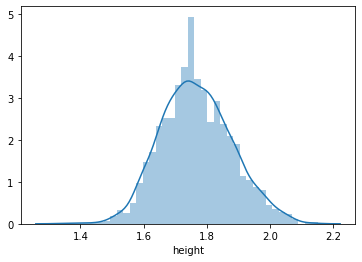

In [20]:
sns.distplot(sample);

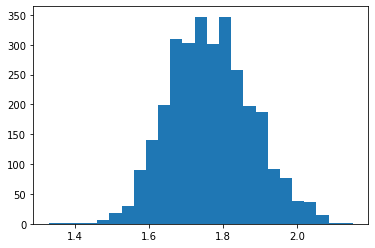

In [21]:
plt.hist(get_sample(df, 'height', 3000), bins=25,);

In [22]:
import statsmodels.api as sm

In [23]:
import pylab as pyb

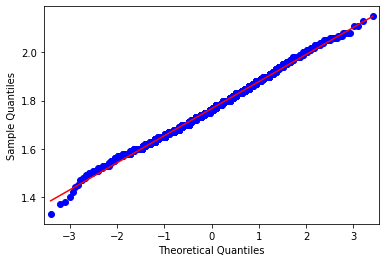

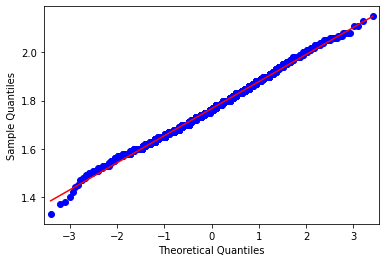

In [24]:
sm.qqplot(get_sample(df, 'height', 3000), line="s")

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [25]:
sample = get_sample(df, 'height', 3000)
sample

1811     1.79
7962     1.81
10280    1.83
317      1.68
6989     2.01
         ... 
1483     1.75
2586     1.78
2949     1.60
10268    1.75
5892     1.76
Name: height, Length: 3000, dtype: float64

In [26]:
def q2():
    return True if sct.jarque_bera(sample)[1] > 0.05 else False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [27]:
sample = get_sample(df, 'weight', 3000)
sample

2162      80.0
3450      70.0
6886      69.0
3871      66.0
6383      82.0
         ...  
11255     63.0
9790      61.0
4127     125.0
463       54.0
6664      62.0
Name: weight, Length: 3000, dtype: float64

In [28]:
def q3():
    return True if sct.normaltest(sample)[1] > 0.05 else False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

In [29]:
sample = get_sample(df, 'weight', 3000)

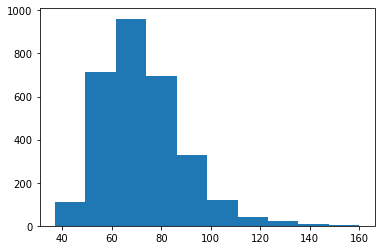

In [30]:
plt.hist(sample);

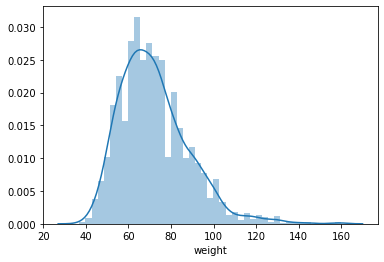

In [31]:
sns.distplot(sample);

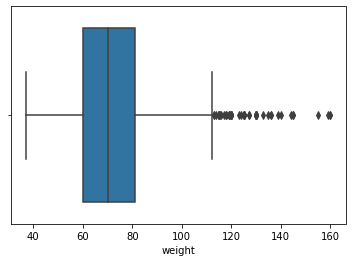

In [32]:
sns.boxplot(sample);

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [33]:
df['weight_log'] = np.log(df.loc[:,'weight'])

In [34]:
sample = get_sample(df, 'weight_log', 3000)
sample

2162     4.382027
3450     4.248495
6886     4.234107
3871     4.189655
6383     4.406719
           ...   
11255    4.143135
9790     4.110874
4127     4.828314
463      3.988984
6664     4.127134
Name: weight_log, Length: 3000, dtype: float64

In [35]:
def q4():
    return True if sct.normaltest(sample)[1] > 0.05 else False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

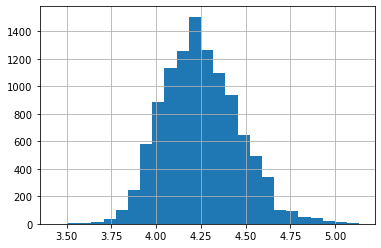

In [36]:
df['weight_log'].hist(bins=25);

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [37]:
bra = df.loc[df['nationality'] == 'BRA']['height']
bra

79       1.82
106      1.87
109      1.70
114      1.84
128      1.66
         ... 
11052    1.78
11136    1.66
11228    1.83
11404    1.78
11457    1.70
Name: height, Length: 485, dtype: float64

In [38]:
usa = df.loc[df['nationality'] == 'USA']['height']
usa

6        2.05
13       1.61
14       1.78
64       1.66
104      1.73
         ... 
11242    1.86
11339    1.61
11436    1.78
11437    1.94
11439    1.91
Name: height, Length: 567, dtype: float64

In [39]:
can = df.loc[df['nationality'] == 'CAN']['height']
can

2        1.98
77       1.82
92       1.82
238      1.68
332      1.68
         ... 
10871    1.78
11002    1.95
11003    1.95
11156    1.73
11401    2.00
Name: height, Length: 321, dtype: float64

In [40]:
p_value = sct.ttest_ind(bra, usa, equal_var = False, nan_policy='omit')[1]
p_value

0.0013080041830140115

In [41]:
def q5():
    return True if p_value > 0.05 else False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [42]:
p_value = sct.ttest_ind(bra, can, equal_var = False, nan_policy='omit')[1]
p_value

0.5230827295440921

In [43]:
def q6():
    p_value = sct.ttest_ind(bra, can, equal_var = False, nan_policy='omit')[1]
    return True if p_value > 0.05 else False

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [44]:
p_value = sct.ttest_ind(usa, can, equal_var = False, nan_policy='omit')[1]
p_value

0.0004660129347389851

In [45]:
def q7():
    return round(float(p_value), 8)

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?